## HW #3
#### Student name: Olha Tanyuk

This is a pretty simple assignment.  You will do something you do every day, but today it will be with matrix manipulations.

The problem is: you and your work friends are trying to decide where to go for lunch. You have to pick a restaurant thats best for everyone.  
Then you should decide if you should split into two groups so everyone is happier.

Despite the simplicity of the process you will need to make decisions regarding how to process the data.

This process was thougholy investigated in the operation research community.  This approach can prove helpful on any number of decision making problems that are currently not leveraging machine learning.

You asked your 10 work friends to answer a survey. They gave you back the following dictionary object.

Transform the restaurant data into a matrix(M_resturants) use the same column index.

The most imporant idea in this project is the idea of a linear combination.

#### 1. Informally describe what a linear combination is  and how it will relate to our resturant matrix.

        A linear combination is an expression of a set of terms that is 
        constructed by multipying the terms by some constant and adding the 
        results to form a singal scalar
        Ex:  Vector [1,2,3,4,5]  ; scalars/coefficients [a,b,c,d,e]
        Linear_Combination = a*1 + b*2 + c*3 + d*4 + e*5


#### 2. Choose a person and compute(using a linear combination) the top restaurant for them.  What does each entry in the resulting vector represent.

#### 3. Next compute a new matrix (M_usr_x_rest  i.e. an user by restaurant) from all people.  What does the a_ij matrix represent?

#### 4. Sum all columns in M_usr_x_rest to get optimal restaurant for all users. What do the entry’s represent?

#### 5. Now convert each row in the M_usr_x_rest into a ranking for each user and call it M_usr_x_rest_rank.   Do the same as above to generate the optimal restaurant choice.

#### 6. Why is there a difference between the two?  What problem arrives?  What does represent in the real world?

#### 7. How should you preprocess your data to remove this problem.

#### 8. Find user profiles that are problematic, explain why?

#### 9. Think of two metrics to compute the disatistifaction with the group.

#### 10. Should you split in two groups today?

#### 11. Ok. Now you just found out the boss is paying for the meal. How should you adjust. Now what is best restaurant?

#### 12. Tommorow you visit another team. You have the same restaurants and they told you their optimal ordering for restaurants.  Can you find their weight matrix?


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%%
#Set a seed for consistent results
np.random.seed(seed=1)
##Generate 10 rows of 4 random values which each sum to 1 for peoples' preferences
#npRatings=np.array(np.random.dirichlet(np.ones(4),size=10))
#Peoples' Preferenmces in nested dictionaries (Automate this if I have time)
people = {'Jane': {'willingness to travel': 0.1596993,
                  'desire for new experience':0.67131344,
                  'cost':0.15006726,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.01892,
                  },
          'Bob': {'willingness to travel': 0.63124581,
                  'desire for new experience':0.20269888,
                  'cost':0.01354308,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.15251223,
                  },
           'Charlie': {'willingness to travel': 0.312165,
                  'desire for new experience':0.472797,
                  'cost':0.0874337,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.127604,
                  },
            'Daniel': {'willingness to travel': 0.24375,
                  'desire for new experience':0.521329,
                  'cost':0.0568194,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.178102,
                  },
            'Emma': {'willingness to travel': 0.467763,
                  'desire for new experience':0.503437,
                  'cost':0.0198863,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.00891349,
                  },
            'Felicia': {'willingness to travel': 0.0632823,
                  'desire for new experience':0.185856,
                  'cost':0.0351984,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.715663,
                  },
            'Gary': {'willingness to travel': 0.577415,
                  'desire for new experience':0.138869,
                  'cost':0.214609,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.0691065,
                  },
            'Helen': {'willingness to travel': 0.265751,
                  'desire for new experience':0.412282,
                  'cost':0.0042287,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.317738,
                  },
            'Igor': {'willingness to travel': 0.147972,
                  'desire for new experience':0.269156,
                  'cost':0.551767,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.0311052,
                  },
            'Jimmy': {'willingness to travel': 0.446693,
                  'desire for new experience':0.37458,
                  'cost':0.0681147,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.110612,
                  },
                  }

In [3]:
#Transform the user data into a matrix(M_people).
#Keep track of column and row ids.
#Normalize the points for each user -- make their preferences add to 1.
peopleKeys, peopleValues = [], []
lastKey = 0
for k1, v1 in people.items():
    row = []
    for k2, v2 in v1.items():
        peopleKeys.append(k1+'_'+k2)
        if k1 == lastKey:
            row.append(v2)      
            lastKey = k1
        else:
            peopleValues.append(row)
            row.append(v2)   
            lastKey = k1
M_people = np.array(peopleValues)

In [6]:
#Verify the sums = 1
np.sum(M_people, axis=1)

array([1.        , 1.        , 0.9999997 , 1.0000004 , 0.99999979,
       0.9999997 , 0.9999995 , 0.9999997 , 1.0000002 , 0.9999997 ])

In [7]:
# Transform the restaurant data into a matrix(M_restaurants)
# use the same column index.
#Generate 10 rows of random values between 1 and 10

names  = ['Flacos', 'Joes', 'McDonalds', 'BurgerKing', 'DannysTasteOfTexas ',
          'RedLobster', 'TGIFridays', 'OliveGarden', 'Derpburgers', 'PHO501']
cats = ['Distance', 'Novelty', 'Cost', 'Vegetarian']

def make_restaurants_dict(names, categories):
    restaurants = {}

    for n in names:
        npRandScores=np.random.randint(1,11,10)
        dict_input = dict(zip(categories, npRandScores))
        restaurants[n] = dict_input
    
    return restaurants

restaurants = make_restaurants_dict(names, cats)
#%%
restaurantsKeys, restaurantsValues = [], []
for k1, v1 in restaurants.items():
    for k2, v2 in v1.items():
        restaurantsKeys.append(k1+'_'+k2)
        restaurantsValues.append(v2)
#Noted that the shape needs to be the same shape as people matrix
#len(restaurantsValues)
#create np matrix and reshape to 10 by 4 in the same function
M_restaurants = np.reshape(restaurantsValues, (10,4))
#Verify shape
M_restaurants.shape

(10, 4)

In [9]:
M_restaurants

array([[ 6,  9, 10,  6],
       [ 3,  5,  6,  3],
       [ 2,  8,  1,  7],
       [ 1,  2,  9,  9],
       [ 6,  2, 10,  4],
       [10,  3,  1,  5],
       [ 7, 10,  4,  8],
       [ 9,  1,  3,  8],
       [ 8,  8,  2,  2],
       [ 7,  3,  6,  8]])

## 1.
#### Informally describe what a linear combination is  and how it will relate to our resturant matrix.

a linear combination is an expression constructed from a set of terms by multiplying each term by a constant and adding the results (e.g. a linear combination of x and y would be any expression of the form ax + by, where a and b are constants).
In our case we are getting the product of each rating for each restaurant (constants) and each persons preferences.  For example Jane’s willingness to travel is 0.1596993 and Flaco’s distance is 6 (Out of 10 where 10 is most desreable) Jane’s weighted willingness to travel to flaco's is 6(0.1596993) = 0.958194.
Her weighted willingness to travel to Joes's is 1(0.1596993) = 0.1596993. This tells us that judging only from distance Flacos is best for Jane.

## 2.
#### Choose a person and compute(using a linear combination) the top restaurant for them.  What does each entry in the resulting vector represent.

In [8]:
#Swap axis on M_people
#alt_M_people = M_people
M_people = np.swapaxes(M_people, 1, 0)
#%%
#Figure out mappings
#janeTemp= M_people[:,0]
#flacoTemp=M_restaurants[0,:]
#arguments are 1st rows, 2nd columns
#For Jane only Flacos:
#janeFlacosResults=np.matmul(M_restaurants[0,:], M_people[:,0])
#For Jane all Restaurants:
janeAllResults=np.matmul(M_restaurants, M_people[:,0])
feliciaAllResults=np.matmul(M_restaurants, M_people[:,5])
janeAllResults

array([8.61420936, 4.79282866, 5.97241338, 3.02321152, 3.87717528,
       3.85560058, 8.58265854, 2.71016892, 6.98607644, 4.18359898])

At this point the result shows that the best restaurant for jane is 'Flacos' (janeAllResults[0]=8.61). We are using 
the "Dot Product". Each result in the janeAllResults vector is the 
(weighted importance of each of Janes preferences) * (Each restaurants rating)

## 3.
#### Next compute a new matrix (M_usr_x_rest  i.e. an user by restaurant) from all people.  What does the a_ij matrix represent?

In [10]:
M_usr_x_rest=np.matmul(M_restaurants, M_people)
M_usr_x_rest

array([[8.61420936, 6.66226896, 7.768124  , 7.791267  , 7.58985494,
        6.6983598 , 7.27504   , 7.253759  , 9.0145372 , 7.396197  ],
       [4.79282866, 3.446027  , 4.2078942 , 4.2131174 , 4.06653227,
        3.4773063 , 3.9215635 , 3.8372492 , 5.1936136 , 3.9535032 ],
       [5.97241338, 3.96521135, 5.3873677 , 5.9616654 , 5.04530273,
        6.658252  , 2.9641365 , 6.0581527 , 3.2186954 , 4.7324247 ],
       [3.02321152, 2.53114136, 3.1930983 , 3.4007006 , 1.73383511,
        7.1927469 , 3.4085925 , 3.9880153 , 5.9321338 , 2.8043933 ],
       [3.87717528, 4.93835234, 4.203337  , 3.78576   , 4.04796896,
        3.9660418 , 6.164744  , 3.732309  , 7.0682348 , 4.552913  ],
       [3.85560058, 7.69665897, 5.2654947 , 4.9488164 , 6.25239475,
        4.8039044 , 6.7508985 , 5.4872747 , 2.994481  , 6.2118447 ],
       [8.58265854, 7.71997963, 8.2836918 , 8.5716336 , 8.45956412,
        8.1676337 , 6.841883  , 8.5418958 , 6.1832736 , 8.0300058 ],
       [2.71016892, 7.14463825, 4.5654151

This matrix represents each persons weighted preferences for each category (all persons are balanced since all must sum to 1) multiplied by the rating of each category in each restaurant. We can rank the restaurants for each person and use the results to determine which will be the consensus favorite choice for the whole group of 10. We are using the "Dot Product" when multiplying these matrices.

## 4.
#### Sum all columns in M_usr_x_rest to get optimal restaurant for all users. What do the entry’s represent?

In [11]:
groupFavorites=np.sum(M_usr_x_rest, axis=1)
groupFavorites

array([76.06361726, 41.10963533, 49.96362186, 37.20786869, 46.33683618,
       54.2673687 , 79.38221959, 51.04115999, 62.40832576, 55.51932643])

groupFavorites represents the sum of each restaurants weigted score from each person. The result shows that the best restaurant 
considering all 10 peoples preferences versus the restaurants 1-10 rating is groupFavorites[6] TGIFridays.
We are using the "Dot Product" when multiplying these matrices.

## 5.6.7.
#### Now convert each row in the M_usr_x_rest into a ranking for each user and call it M_usr_x_rest_rank. Do the same as above to generate the optimal resturant choice. Why is there a difference between the two?  What problem arrives?  What does represent in the real world? How should you preprocess your data to remove this problem?

In [12]:
M_usr_x_rest_rank = M_usr_x_rest.argsort()
M_usr_x_rest_rank

array([[1, 5, 7, 6, 9, 4, 2, 3, 0, 8],
       [1, 5, 7, 6, 9, 4, 2, 3, 0, 8],
       [6, 8, 1, 9, 4, 2, 3, 0, 7, 5],
       [4, 1, 9, 0, 2, 3, 6, 7, 8, 5],
       [7, 3, 0, 5, 4, 2, 9, 1, 6, 8],
       [8, 0, 5, 3, 2, 7, 9, 4, 6, 1],
       [8, 6, 1, 9, 5, 2, 4, 7, 3, 0],
       [0, 8, 3, 2, 4, 7, 9, 6, 5, 1],
       [5, 8, 7, 6, 3, 2, 9, 0, 1, 4],
       [0, 4, 3, 2, 8, 9, 7, 6, 1, 5]], dtype=int64)

When we convert from scores to rank we are losing the relative importance of things. For example: Felicia REALLY doesn't want to eat meat and it is probably a disqualifying factor for her. If we rank the importance of her preferences vegeterian appears as the most important #1(of4) to her as expected. However she actually indicated this is 71.5 % weight of her preference therfore we are losing some precision. If she gave vegeterian .28 and all others .24 it would still rank #1 but we wouldnt know that it isn't all that important. I would prefer to use the calculated values rather than ranks until we have final scores for the restaurants. The argsort function is a bit confusing. It sorts and ranks in ascending order and indicates the index location rather than the actual values. The finalRestRank matrix created below indicates that the highest ranking choice is
in index 6 location (TGI Fridays).

In [13]:
finalRestRank=groupFavorites.argsort()
finalRestRank

array([3, 1, 4, 2, 7, 5, 9, 8, 0, 6], dtype=int64)

## 8.
#### Find  user profiles that are problematic, explain why?

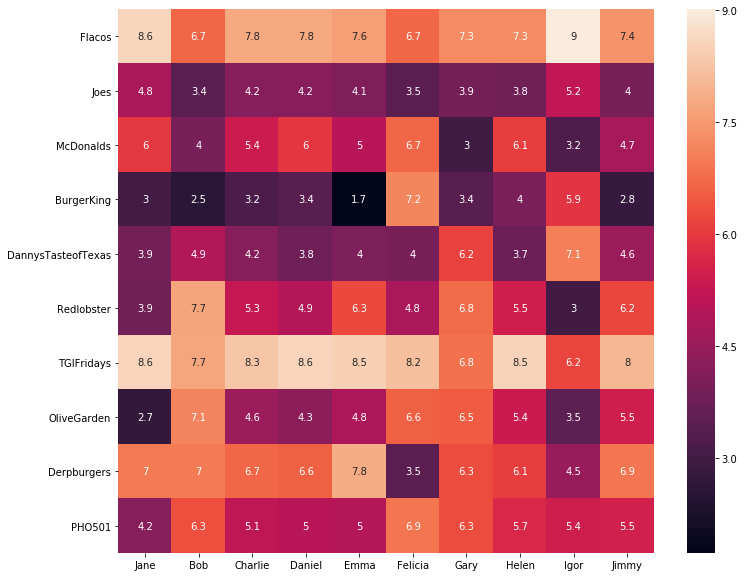

In [14]:
import pandas as pd
derp= pd.DataFrame(data=M_usr_x_rest)


derp.columns= ['Jane','Bob','Charlie','Daniel','Emma','Felicia','Gary',
               'Helen','Igor','Jimmy',]
derp.rename(index={0:'Flacos',1:'Joes',2:'McDonalds',3:'BurgerKing',
                   4:'DannysTasteofTexas',5:'Redlobster',6:'TGIFridays',
                   7:'OliveGarden',8:'Derpburgers',9:'PHO501'}, inplace=True)

plot_dims = (12,10)
fig, ax = plt.subplots(figsize=plot_dims)
sns.heatmap(ax=ax, data=derp, annot=True)
plt.show()

I am looking for outliers to see if anyone has unusual preferences. The heatmap indicates that Gary and Igor score TGI Fridays (the group's top choice) with 6.8 and 6.2 which is possibly insignificant but relatively lower than everyone else. They might not be too happy about going to TGIFridays. I also see that Bob and Felicia aren't too happy with Flacos (the group's
second choice)

## 9.10.
#### Think of two metrics to compute the disatistifaction with the group. Should you split in two groups today?

[0.50008779 0.27011315 0.22979905]


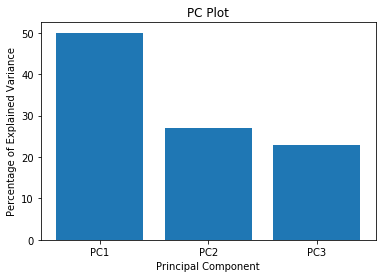

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)  
peopleMatrixPcaTransform = pca.fit_transform(M_people)
print(pca.explained_variance_ratio_)
#Theres no need to scale for PCA since we are already on a common scale.  I avoid Pandas for processing but for 
#displaying results I will use it.
#Generate Coords for a graph based on the loading scores and scaled data
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
#Create labels
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
#Create matplotlib bar (scree) plot
#Noted that a 4th compoinent doesnt explain a significant amount of the 
#variance so I reduced to 3 components
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('PC Plot')
plt.show()

Almost 100% of the variance is explained by the first 3 components.

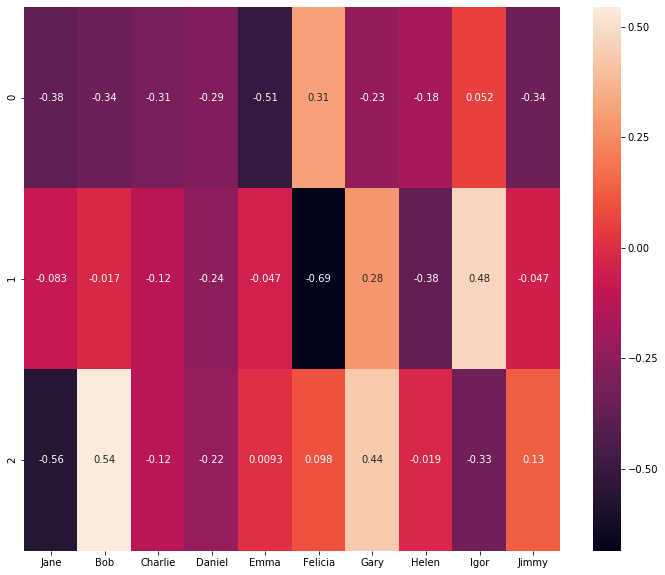

In [19]:
#Find out who the people with unusual preferences are
uniqueNeeds = pca.components_
pduniqueNeeds= pd.DataFrame(data=uniqueNeeds)
pduniqueNeeds.columns= ['Jane','Bob','Charlie','Daniel','Emma','Felicia','Gary',
               'Helen','Igor','Jimmy',]
plot_dims = (12,10)
fig, ax = plt.subplots(figsize=plot_dims)
sns.heatmap(ax=ax, data=pduniqueNeeds, annot=True)
plt.show()

We can see in PC1 that Felicia's and Igor's preferences are quite different than the others and causing variance. In PC2 Felicia's, Gary's and Igor's preferences are the culprits. PC0: Emma and Felicia are causing variance. PC2: Jane vs Bob and Gary. However the highest rank restaurant TGI Fridayu's does seem to please all them. 
Assuming we prefer to socialize I would not split the group.

## 11.
#### Ok. Now you just found out the boss is paying for the meal. How should you adjust. Now what is best restaurant?

In this case we need to increase "cost" preference for each employee. And in that case the group will choose the most expensive restaurant "Flacos".

## 12.
#### Tommorow you visit another team. You have the same restaurants and they told you their optimal ordering for restaurants.  Can you find their weight matrix?

No, we can not. When the values are ranked the precision is lost.